In [0]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 2.8MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [0]:
import pandas as pd

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [0]:
ls -la

total 12
drwx------ 2 root root 4096 Mar  2 07:55 data/
drwx------ 2 root root 4096 Mar  2 07:53 .git/
-rw------- 1 root root 1799 Mar  2 07:53 .gitignore
-rw------- 1 root root 1077 Mar  2 07:53 LICENSE
-rw------- 1 root root   46 Mar  2 07:53 README.md


In [0]:
df=pd.read_hdf('data/car.h5')

In [0]:
df.shape
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

In [0]:
df.sample(5)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
125010,"[Osobowe, BMW, Seria 1, 116, BMW Seria 1 F20 (...","11:33, 28 lutego 2018",PLN,Cena Brutto,39000.0,"Gdańsk, Pomorskie, Brzeźno",None,Osoba prywatna,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,False,True,True,False,True,True,True,True,...,None,Tak,Osoby prywatnej,116 KM,None,Niemcy,None,None,Tak,Diesel,None,None,None,None,116,None,None,Seria 1,1 600 cm3,None,None,None,None,None,None,None,None,None,Szary,None,None,Używane,F20 (2011-),None,None,None,Tak,None,None,125010
41943,"[Osobowe, Ford, Focus, Ford Focus Mk3 (2010-)]","11:37, 3 marca 2018",PLN,"Cena Brutto, Faktura VAT",57900.0,"Jagiellońska 147/151 - 42-200 Częstochowa, Str...",Frank-Cars Sp. z o.o Dealer Ford,Dealer,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,None,Tak,Firmy,95 KM,None,Polska,None,None,Tak,Diesel,Tak,None,None,None,None,None,None,Focus,1 500 cm3,None,None,None,None,None,None,None,None,None,Biały,None,None,Używane,Mk3 (2010-),None,None,None,Tak,None,None,41943
28931,"[Osobowe, Opel, Corsa, Opel Corsa D (2006-2014)]","10:34, 5 marca 2018",PLN,Cena Brutto,16900.0,"Kępno, kępiński, Wielkopolskie",None,Osoba prywatna,False,False,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,None,Tak,Osoby prywatnej,80 KM,None,Niemcy,None,None,None,Benzyna,None,None,None,None,None,None,None,Corsa,1 249 cm3,None,None,None,None,None,None,None,None,None,Srebrny,None,None,Używane,D (2006-2014),None,None,None,None,None,None,28931
9589,"[Osobowe, Hyundai, ix35]","14:05, 5 marca 2018",PLN,Cena Brutto,43800.0,"Boczna 206/7 - 73-108 Zieleniewo, stargardzki,...",Auto Komis Sokół DEALER SAMOCHODÓW UŻYWANYCH ...,Dealer,False,False,False,False,False,False,True,False,True,True,True,True,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,...,None,Tak,Firmy,135 KM,None,Niemcy,None,None,Tak,Benzyna,Tak,None,None,None,None,None,None,ix35,1 591 cm3,None,None,

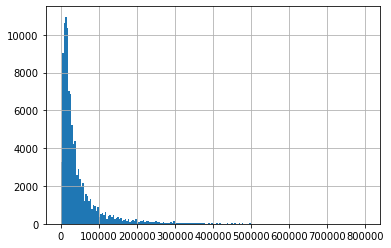

In [0]:
df['price_value'].hist(bins=200)

In [0]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

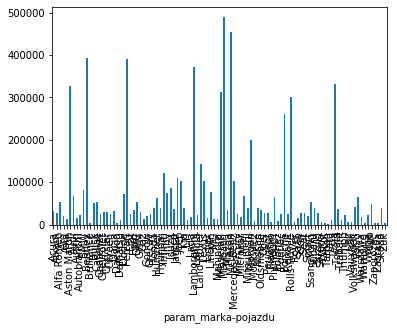

In [0]:
df.groupby('param_marka-pojazdu')['price_value'].agg(np.mean).plot(kind='bar')

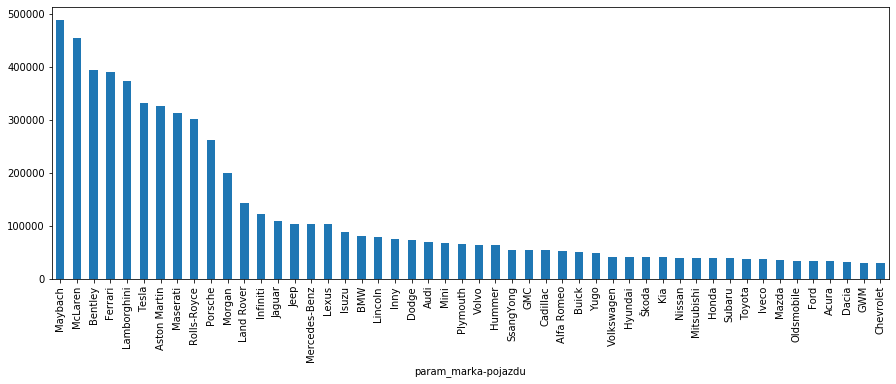

In [0]:
(df.groupby('param_marka-pojazdu')['price_value']
.agg(np.mean)
.sort_values(ascending=False)
.head(50)
).plot(kind='bar',figsize=(15,5))

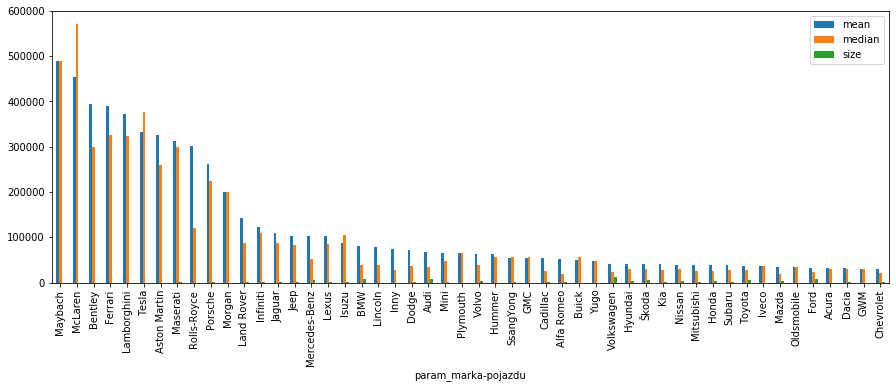

In [38]:
(df.groupby('param_marka-pojazdu')['price_value']
.agg([np.mean,np.median,np.size])
.sort_values(by='mean',ascending=False)
.head(50)
).plot(kind='bar',figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f335e22fbe0>,
      dtype=object)

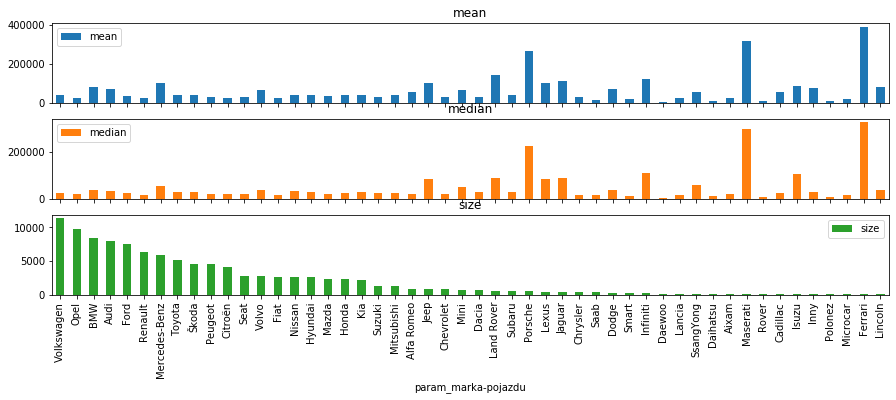

In [40]:
(df.groupby('param_marka-pojazdu')['price_value']
.agg([np.mean,np.median,np.size])
.sort_values(by='size',ascending=False)
.head(50)
).plot(kind='bar',figsize=(15,5),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f335de13dd8>,
      dtype=object)

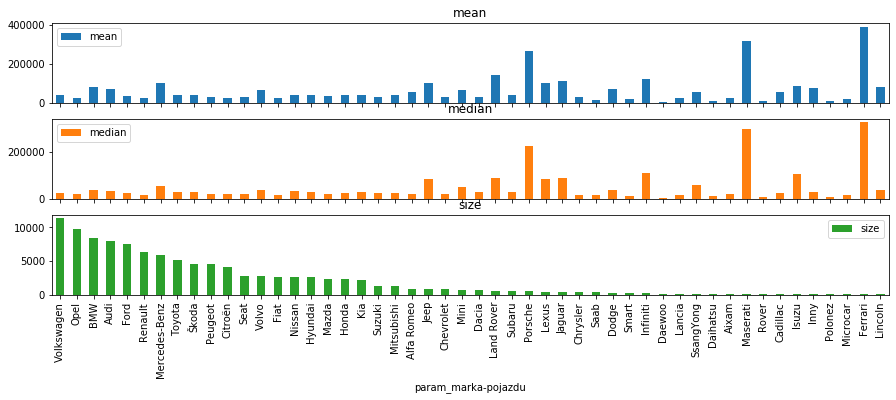

In [69]:
def abc():
  return(
    df.groupby('param_marka-pojazdu')['price_value']
    .agg([np.mean,np.median,np.size])
    .sort_values(by='size',ascending=False)
    .head(50)
    ).plot(kind='bar',figsize=(15,5),subplots=True)


abc()  

In [0]:
def group_and_barplot(feat_groupby,feat_agg,agg_func=[np.mean,np.median,np.size],feat_sort='size',top=50,subplots=True):
  return (
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_func)
    .sort_values(by=feat_sort,ascending=False)
    .head(top)
    ).plot(kind='bar',figsize=(15,5),subplots=subplots
  )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f335cf2e668>,
      dtype=object)

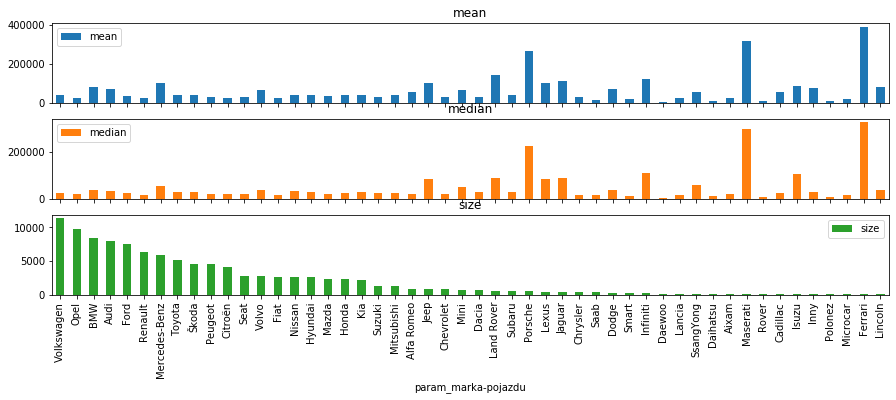

In [74]:
group_and_barplot(feat_groupby='param_marka-pojazdu',feat_agg='price_value')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f335cf6cfd0>,
      dtype=object)

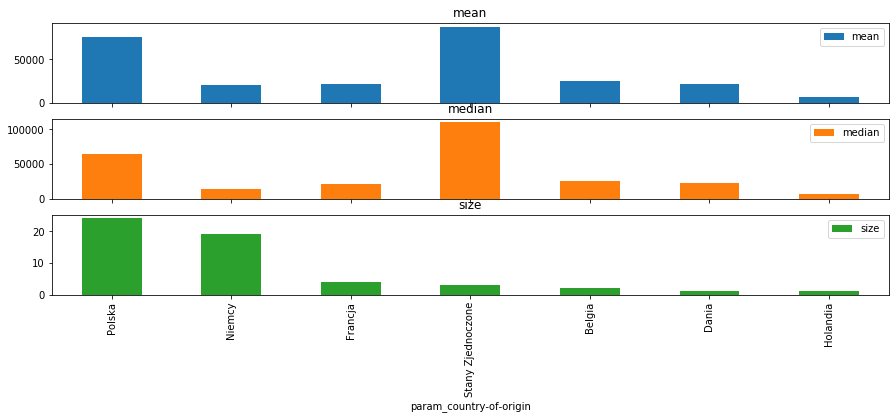

In [77]:
group_and_barplot(feat_groupby='param_country-of-origin',feat_agg='price_value')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f335c682048>,
      dtype=object)

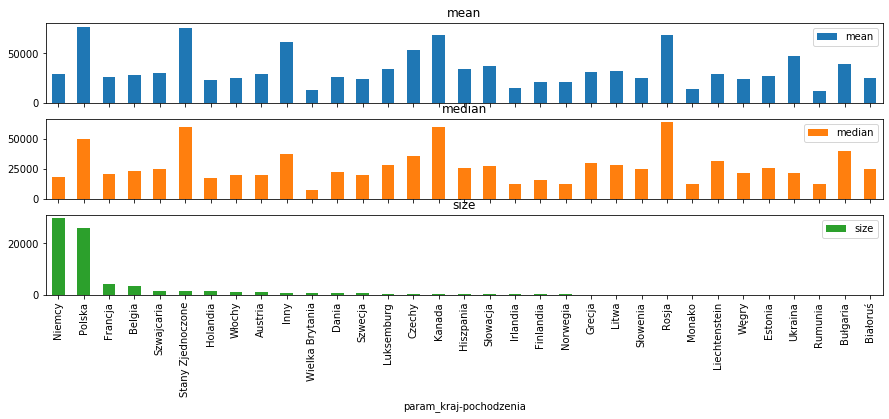

In [80]:
group_and_barplot(feat_groupby='param_kraj-pochodzenia',feat_agg='price_value',feat_sort='size')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f335c2d54e0>,
      dtype=object)

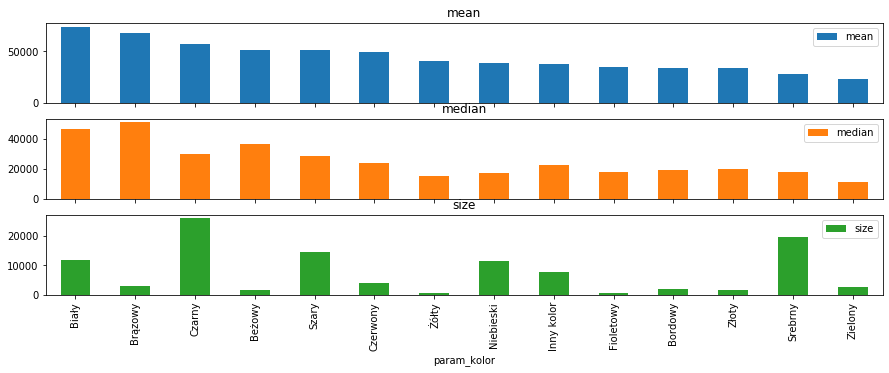

In [82]:
group_and_barplot(feat_groupby='param_kolor',feat_agg='price_value',feat_sort='mean')